In [148]:
import pandas as pd
import numpy as np
# print(pd.__version__)

In [149]:
train = pd.read_csv("input/titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
test = pd.read_csv("input/titanic/test.csv")

In [151]:
gender_data = pd.read_csv("input/titanic/gender_submission.csv")
gender_data.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Get some info about data

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Get missing values and duplicates

In [153]:
pd.set_option('display.max_columns', None)
print("----------------------------------------------------")
print("Percentage of NA per property (sorted)")
print("----------------------------------------------------")
p = (train.isna().sum()/len(train)*100).sort_values(ascending=False)
print(p)

print("----------------------------------------------------")
print("Unique values in each property")
print("----------------------------------------------------")
train.nunique().sort_values()


----------------------------------------------------
Percentage of NA per property (sorted)
----------------------------------------------------
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64
----------------------------------------------------
Unique values in each property
----------------------------------------------------


Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

Checkout some correlations between columns

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# plt.scatter(train['Cabin'], )

In [156]:
def cleanData(data):
    # Handling missing values
    # Since we dont have 77% (more than 3/4th) of data we'll assume that NaN in "Cabin" means the passenger did not have a Cabin
    # Create a new feature for this and drop "Cabin"
    data['Has_Cabin'] = data['Cabin'].apply(lambda x : 0 if type(x) == float else 1)
    data.drop(['Cabin'], axis=1, inplace=True) 
    # 19% of Age data is missing, which can be filled in using randomly selecting age from range of ages available in our data
    avg_age = data['Age'].mean()
    std_dev_age = data['Age'].std()
    age_null_count = data['Age'].isnull().sum()
    randm_age_list = np.random.randint(avg_age-std_dev_age, avg_age+std_dev_age, size = age_null_count)
    data['Age'][np.isnan(data['Age'])] = randm_age_list
    data['Age'] = data['Age'].astype(int)
    # Next is 'Embarked', but it doesn't matter where they started their journey from, so let' just drop 'Embarked'
    data.drop(['Embarked'], axis=1, inplace = True)

    # Handling Categorical values
    # These are the columns with categorical values:
    # Name, Sex, Ticket, Cabin, Embarked, where we already dropped 'Embarked' and 'Cabin'
    # Similarly let's drop 'Name' and 'Ticket' because that shouldn't be related to the accident survival
    data.drop(['Name', 'Ticket'], axis=1, inplace=True)
    # Remaining field: Sex, let's manually map it to 0: Male and 1: Female
    data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

    # Remove irrelevant columns
    # If we see from the remaining columns the 'PassengerId' and 'Fare' would not bring any value to determining Survival, 
    # so let's drop it
    # data.drop(['PassengerId'], axis=1, inplace=True)
    data.drop(['Fare'], axis=1, inplace=True)
    return data
    



In [157]:
cleaned_train = cleanData(train)
cleaned_test = cleanData(test)

C:\Users\Parth\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [158]:
cleaned_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Has_Cabin
0,1,0,3,0,22,1,0,0
1,2,1,1,1,38,1,0,1
2,3,1,3,1,26,0,0,0
3,4,1,1,1,35,1,0,1
4,5,0,3,0,35,0,0,0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

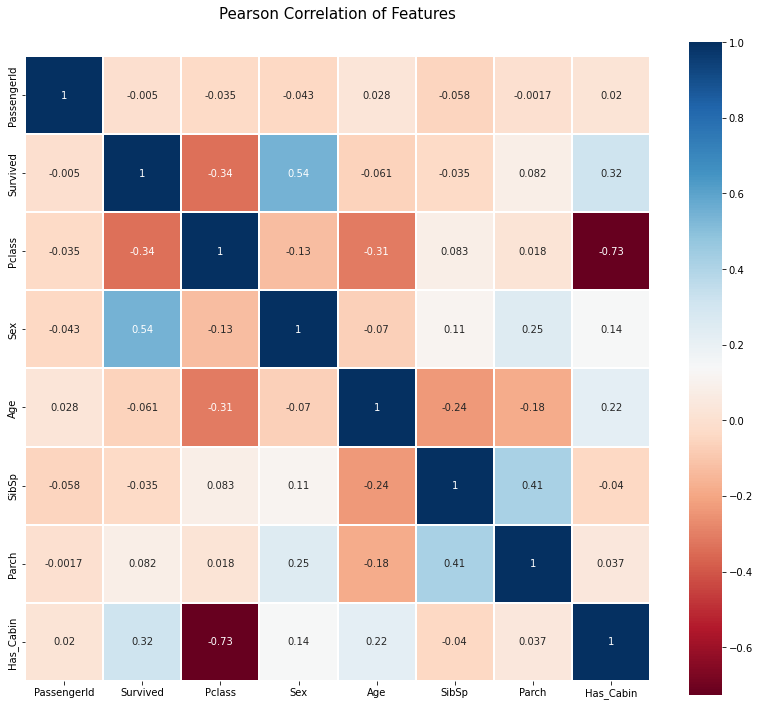

In [159]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cleaned_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

'Sex' seem to have maximum correlation with the results, that too not very strong
Let's keep these features and try out classification algorithms

Let's remove features where correlation is less than 0

In [160]:
# cleaned_train.drop(['Pclass', 'SibSp', 'Age'], axis=1, inplace=True)
# cleaned_test.drop(['Pclass', 'SibSp', 'Age'], axis=1, inplace=True)

In [161]:
from sklearn.model_selection import train_test_split

# X and y
y = cleaned_train['Survived']
cleaned_train.drop(['Survived'], axis=1, inplace=True)
X = cleaned_train

# Split train and validaiton data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [162]:
cleaned_train.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Has_Cabin
0,1,3,0,22,1,0,0
1,2,1,1,38,1,0,1
2,3,3,1,26,0,0,0
3,4,1,1,35,1,0,1
4,5,3,0,35,0,0,0


In [163]:
from sklearn.metrics import accuracy_score

def fitAndPredict(model):
    model.fit(X_train, y_train)
    # prediction = model.predict(X_val)
    return model.score(X_train, y_train), model.score(X_val, y_val)

In [164]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model1 = MultinomialNB()
model2 = LogisticRegression(random_state=42, max_iter=1000)
model3 = KNeighborsClassifier()
model4 = SVC()
model5 = RandomForestClassifier()
model6 = GradientBoostingClassifier(max_features=5, min_samples_split=20)


models = [model1, model2, model3, model4, model5, model6]
for model in models:
    print("model:", model)
    print("Accuracy: ", fitAndPredict(model))

model: MultinomialNB()
Accuracy:  (0.6966292134831461, 0.6871508379888268)
model: LogisticRegression(max_iter=1000, random_state=42)
Accuracy:  (0.7949438202247191, 0.8212290502793296)
model: KNeighborsClassifier()
Accuracy:  (0.7064606741573034, 0.5363128491620112)
model: SVC()
Accuracy:  (0.6235955056179775, 0.5865921787709497)
model: RandomForestClassifier()
Accuracy:  (1.0, 0.8100558659217877)
model: GradientBoostingClassifier(max_features=5, min_samples_split=20)
Accuracy:  (0.8778089887640449, 0.8212290502793296)


Neural network

In [165]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

Define a dataset

In [166]:
class TitanicDataSet(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    def __len__(self):
        return len(self.X)


In [167]:
X_train = X_train.reset_index(drop=True)

X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Has_Cabin
0,332,1,0,45,0,0,1
1,734,2,0,23,0,0,0
2,383,3,0,32,0,0,0
3,705,3,0,26,1,0,0
4,814,3,1,6,4,2,0
...,...,...,...,...,...,...,...
707,107,3,1,21,0,0,0
708,271,1,0,35,0,0,0
709,861,3,0,41,2,0,0
710,436,1,1,14,1,2,1


In [168]:
X_train.iloc[0:2]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Has_Cabin
0,332,1,0,45,0,0,1
1,734,2,0,23,0,0,0


In [169]:
trainData = TitanicDataSet(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
valData = TitanicDataSet(torch.FloatTensor(X_val.values), torch.FloatTensor(y_val.values))

train_loader = DataLoader(dataset=trainData, batch_size=16)
val_loader = DataLoader(dataset=valData, batch_size=16)

Define a NN Model

In [170]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()

        # Since number of input features is 7
        self.layer1 = nn.Linear(7, 32)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 32)
        self.relu2 = nn.ReLU()
        # self.layer3 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(32, 1)
        self.batchNorm1 = nn.BatchNorm1d(32)
        self.batchNorm2 = nn.BatchNorm1d(32)
        self.dropout = nn.Dropout(p=0.1)


    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.batchNorm1(x)
        x = self.relu2(self.layer2(x))
        x = self.batchNorm2(x)
        x = self.dropout(x)
        x = self.layer3(x)
        return x

In [171]:
model = BinaryClassification()
print(model)

BinaryClassification(
  (layer1): Linear(in_features=7, out_features=32, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (relu2): ReLU()
  (layer3): Linear(in_features=32, out_features=1, bias=True)
  (batchNorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [172]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def accuracy(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    total_correct_results = (y_pred_tag == y_test).sum().float()
    accuracy = total_correct_results/y_test.shape[0]
    acc = torch.round(accuracy * 100)
    return acc


In [147]:
# Train the model
BATCH_SIZE = 16
EPOCHS = 100


for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    epoch_val_loss = 0
    epoch_val_acc = 0
    model.train()
    for X_batch, y_batch in train_loader:
        # X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = accuracy(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    model.eval()
    for X_batch, y_batch in val_loader:
        y_pred = model(X_batch)
        
        val_loss = criterion(y_pred, y_batch.unsqueeze(1))
        val_acc = accuracy(y_pred, y_batch.unsqueeze(1))
        
        epoch_val_loss += val_loss.item()
        epoch_val_acc += val_acc.item()
    print(f'Validation Loss: {epoch_val_loss/len(val_loader):.5f} | Validation Acc: {epoch_val_acc/len(val_loader):.3f}')
    

Epoch 001: | Loss: 0.73896 | Acc: 54.422
Validation Loss: 0.65120 | Validation Acc: 60.750
Epoch 002: | Loss: 0.74640 | Acc: 52.622
Validation Loss: 0.65252 | Validation Acc: 58.667
Epoch 003: | Loss: 0.73293 | Acc: 53.956
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 004: | Loss: 0.74584 | Acc: 52.622
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 005: | Loss: 0.74232 | Acc: 52.067
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 006: | Loss: 0.74118 | Acc: 51.756
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 007: | Loss: 0.73808 | Acc: 54.111
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 008: | Loss: 0.73876 | Acc: 51.622
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 009: | Loss: 0.73431 | Acc: 54.022
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 010: | Loss: 0.73638 | Acc: 52.156
Validation Loss: 0.65243 | Validation Acc: 59.167
Epoch 011: | Loss: 0.73574 | Acc: 52.889
Validation Loss: 0.65243 | Validation Acc: 59.167

In [ ]:
predictions = model6.predict(cleaned_test)

predictions

In [ ]:
model.eval()
predictions = model(cleaned_test)

predictions

In [ ]:
output = pd.DataFrame({'PassengerId' : cleaned_test.PassengerId, 'Survived': predictions})
output.to_csv('output/my_submission.csv', index=False)